In [1]:
import pygimli as pg
import pygimli.meshtools as mt
from pygimli.physics import ert
import numpy as np

In [2]:
def createDataContainer(dz, dep=0):
    data = ert.DataContainer()
    for i in range(4):
        data.createSensor([0, 0, dep+(i-1.5)*dz])
    
    data.createFourPointData(0, 0, 3, 1, 2)
    data["k"] = ert.geometricFactors(data)
    return data

In [3]:
cylRadius = 0.1
cylHeight = 0.3
elDist = 0.025
elSize = 0.015
geoDia = 0.03
scheme = createDataContainer(elDist, -cylHeight/2)

0.014999999999999998


(<Axes: >, None)

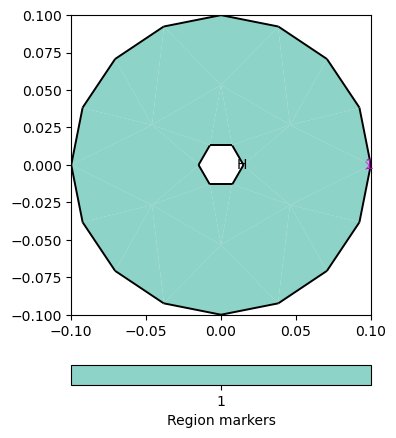

In [4]:
outer = mt.createCircle(radius=cylRadius, nSegments=16, marker=1)
inner = mt.createCircle(radius=geoDia/2, nSegments=6, isHole=True)
print(inner.node(0).pos().distance(inner.node(1).pos()))
plc = outer+inner
pg.show(plc)

[-0.3  -0.2  -0.18 -0.17 -0.16 -0.14 -0.13 -0.12 -0.1   0.  ]


(<Axes: >, None)

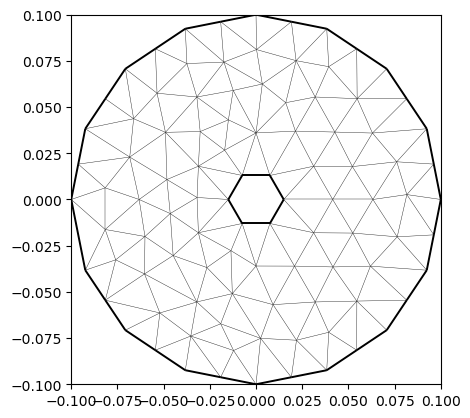

In [5]:
z = [-cylHeight]
for sensor in scheme.sensors():
    z.append(sensor.z()-elSize/2)
    z.append(sensor.z()+elSize/2)

z.append(0)
z = np.round(z, 2)
print(z)
mesh2d = mt.createMesh(plc, quality=34.4, area=0.0003)
pg.show(mesh2d)


In [6]:
plc3d = mt.extrudeMesh(mesh2d, z)
mesh = mt.createMesh(plc3d, quality=1.2)
print(mesh, mesh.dim(), plc3d.dim())
pg.show(plc3d, style="wireframe", backend="trame")

Mesh: Nodes: 1935 Cells: 9328 Boundaries: 19514 3 3


Widget(value="<iframe src='http://localhost:51155/index.html?ui=P_0x298b0339100_0&reconnect=auto' style='width…

(<pyvista.plotting.plotting.Plotter at 0x298b0339100>, None)

In [7]:
mesh.node(0).setMarker(-999)
mesh.node(mesh.nodeCount()-1).setMarker(-1000)

In [8]:
print(z)
zEl = pg.z(scheme)
print(zEl)
nn = -10000
for b in mesh.boundaries():
    bc = b.center()
    if bc.y() > 0 and bc.y() < geoDia/2 and abs(b.norm().y()) > 0.999:
        if np.min(np.abs(zEl-bc.z())) < 0.001:
            b.setMarker(nn)
            nn -= 1

print(np.unique(mesh.boundaryMarkers()))

[-0.3  -0.2  -0.18 -0.17 -0.16 -0.14 -0.13 -0.12 -0.1   0.  ]
4 [-0.1875, -0.1625, -0.13749999999999998, -0.11249999999999999]
[-10002 -10001 -10000      0      1]


In [9]:
kNum = ert.createGeometricFactors(scheme, numerical=True, mesh=mesh, p2=True)

RuntimeError: There is a requested electrode that does not match the given mesh. 

In [ ]:
print(kNum)

1 [0.37888245577322344]


In [ ]:
print(mesh)
meshP2 = pg.Mesh(3)
meshP2.createP2(mesh)
print(meshP2)


Mesh: Nodes: 2100 Cells: 9925 Boundaries: 20797
Mesh: Nodes: 0 Cells: 0 Boundaries: 0


ArgumentError: Python argument types in
    None.createP2(Mesh, Mesh)
did not match C++ signature:
    createP2(GIMLI::Mesh {lvalue})

In [ ]:
fop = ert.ertModelling.ERTModelling(sr=False)
fop.setData(scheme)
fop.setMesh(mesh)
fop.createJacobian(pg.Vector(mesh.cellCount(), 1.0))

19/06/23 - 09:25:16 - pyGIMLi - INFO - Found 1 regions.
19/06/23 - 09:25:16 - pyGIMLi - INFO - Creating forward mesh from region infos.
19/06/23 - 09:25:17 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
19/06/23 - 09:25:18 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 15072 Cells: 79400 Boundaries: 83188
